In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statistics import mean, stdev

1. Two manufacturers of quartz watches (Romex and Tiddot) were tested for durability. The number of days to failure for a sample of size $5$ of both makes is given below:    

    Romex: 101.4, 91.3, 108.0, 104.8, 102.2
    Tiddot: 118.7, 102.5, 99.4, 129.1, 110.1

a. Compute the sample mean and sample variance of Romex and Tiddot watches from the samples given.

In [2]:
R = [101.4, 91.3, 108.0, 104.8, 102.2]
T = [118.7, 102.5, 99.4, 129.1, 110.1]

In [3]:
m_x = len(R)
mu_x = mean(R)
sigma_x =stdev(R)

In [4]:
(mu_x, sigma_x)

(101.54, 6.278375586089129)

In [5]:
m_y = len(T)
mu_y = mean(T)
sigma_y =stdev(T)

In [6]:
(mu_y, sigma_y)

(111.96, 12.144052042049223)

b. Let $\mu_X$ denote the population mean durability of Romex watches, and let $\mu_Y$ denote the population mean durability of Tiddot watches. Test the hypothesis that $\mu_X = \mu_Y$ against the alternative that $\mu_X \neq \mu_Y$ with a 5% significance level. You may assume that both samples come from populations which have equal variances. State any assumptions made and give the approximate $p$-value of the test.

We know that $t=\frac{\bar X-\bar Y-(\mu_X-\mu_y)}{S\sqrt{\frac{1}{m}+\frac{1}{n}}}\sim t(m+n-2)$, thus if we assume that the null hypotesis is true:

In [7]:
S = math.sqrt(((m_x-1)*(sigma_x**2)+(m_y-1)*(sigma_y**2))/(m_x+m_y-2))
t =(mu_x-mu_y)/(S*math.sqrt((1/m_x)+(1/m_y)))

In [8]:
t

-1.7043261903268345

Which is inside the acceptance region of the test:

In [9]:
(-stats.t.ppf(.975, df = m_x+m_y-2),stats.t.ppf(.975, df = m_x+m_y-2))

(-2.3060041350333704, 2.3060041350333704)

The $p$-value of the test is given by:

In [10]:
2*stats.t.cdf(t, df = m_x+m_y-2)

0.12672020822979393

And we conclude there is not enough evidence for rejecting the null hypotesis.

3. The student support service claims in a student newspaper that 60% of students that use the service find it benefits their studies. An independent survey of 200 students who have used the student support service found that 132 out of the 200 stated that use of the service did improve their studies. Using the results of this independent survey, test the validity of the claim that 60% of students that use the student support service think it benefits their studies at a 5% significance level.

We perform a chi-squated goodness of fitness test:

In [11]:
chi2 = ((132-120)**2/120)+((68-80)**2/80)
chi2

3.0

The acceptance given by bounded by:

In [12]:
(0,stats.chi2.ppf(.95, df = 1))

(0, 3.841458820694124)

There is no estrong evidence for rejecting the null hypothesis and the claim is valid.

4. The numbers of a certain kind of crustacean were counted at 20 one-square-meter sites along a coastline, 10 facing South and 10 facing North. The results were as follows:

    South: 28, 27, 31, 45, 21, 10, 30, 32, 25, 38
    
    North: 27, 15, 38, 16, 21, 18, 20, 26, 30, 21

Using a 5% level of significance:
    
    a. Test whether the population variances at each site are equal.
    

We use an hypothesis test with the F-distribution: 

In [13]:
S = [ 28, 27, 31, 45, 21, 10, 30, 32, 25, 38]
N = [ 27, 15, 38, 16, 21, 18, 20, 26, 30, 21]

In [14]:
m_x = len(S)
sigma_x = stdev(S)

m_y = len(N)
sigma_y = stdev(N)

In [15]:
F = (sigma_x/sigma_y)**2
F

1.755070546737213

The acceptance region is given by

In [16]:
(0,stats.f.ppf(.95, dfn = m_x-1, dfd = m_y-1))

(0, 3.178893104458269)

And we accept the null hypothesis.

    b. Test whether the population means at each site are equal, using the result of the previous question to guide your answer.

Analogous to exercise 1 since we can assume the variance are equal by a.

In [17]:
mu_x = mean(S)
mu_y = mean(N)

In [18]:
s_xy = math.sqrt(((m_x-1)*(sigma_x**2)+(m_y-1)*(sigma_y**2))/(m_x+m_y-2))
t =(mu_x-mu_y)/(s_xy*math.sqrt((1/m_x)+(1/m_y)))
t

1.4759819936174412

In [19]:
(-stats.t.ppf(.975, df = m_x+m_y-2),stats.t.ppf(.975, df = m_x+m_y-2))

(-2.10092204024096, 2.10092204024096)

5. A researcher for a harbour control commission wishes to decide whether or not the number of ships that arrive in the harbour follows a Poisson distribution with mean μ = 1.0. The researcher counted the number of ships arriving each hour for a random sample of 70 h and obtained the sample frequencies as given in the below table:

| No. of ships arriving | Frecuency |
|:---------------------:|:---------:|
|           0           |     42    |
|           1           |     21    |
|           2           |     7     |
|       3 or more       |     0     |

Test the hypothesis that the number of ships that arrive in the harbour follows a Poisson distribution with mean μ = 1.0 at a 5% significance level. You may find it helpful to recall that the probability mass function of a Poisson distribution withmean μ is given by $$f (x; \mu) = \frac{\exp (−\mu)\mu^x}{ x!} , x = 0, 1,... .$$

We perform a chi-squated goodness of fitness test:

In [20]:
O_0 = 42
O_1 = 21
O_2 = 7
O_3 = 0

In [21]:
E_0 = 70*math.exp(-1)/math.factorial(0)
E_1 = 70*math.exp(-1)/math.factorial(1)
E_2 = 70*math.exp(-1)/math.factorial(2)
E_3 = 70-(E_0+E_1+E_2)

In [22]:
chi2 = ((O_0-E_0)**2/E_0)+((O_1-E_1)**2/E_1)+((O_2-E_2)**2/E_2)+((O_3-E_3)**2/E_3)
chi2

19.43147215630259

The acceptance region is:

In [23]:
(0,stats.chi2.ppf(.95, df = 3))

(0, 7.814727903251179)

And we reject the null hypothesis.

6. Let $X_1, X_2, ..., X_n$ be a random sample from a Normal distribution with mean μ and variance 1. We wish to test the hypothesis $H_0 : \mu = 0$ against $H_1 : \mu \neq 0$ at the 5% level of significance. Sketch the power function for sample sizes of 25, 100, and 500.

In [24]:
pow = lambda mu: (1- (stats.norm.cdf(1.96-mu*math.sqrt(n))-stats.norm.cdf(-1.96-mu*math.sqrt(n))))

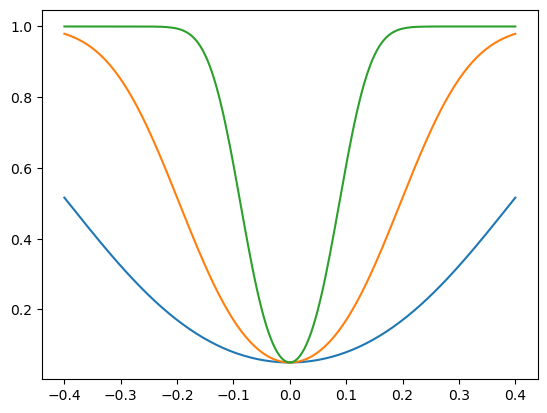

In [25]:
n = 25
x = np.linspace(-.4, .4, num=200)
y = pow(x)
plt.plot(x,y)

n = 100
x = np.linspace(-.4, .4, num=200)
y = pow(x)
plt.plot(x,y)

n = 500
x = np.linspace(-.4, .4, num=200)
y = pow(x)
plt.plot(x,y)

plt.show()

7. Suppose the random variable X is uniformly distributed on [0, θ]. Let Z denote the maximum of a random sample of five observations from X.We wish to test the hypotheses H0 : θ = 1 against the alternative H1 : θ < 1 using the critical region C = {z : z ≤ 0.5}. Find the power function for this hypothesis test and compute its significance level.

The density of the uniform distribution is given by $\theta^{-1}$ on [0, θ], and its distribution function by $\theta^{-1}t$ on [0, θ]. By Thm 2.3 the density of the maximum is $5\theta^{-5}t^{4}$ on [0, θ] implying that the distribution is $\theta^{-5}t^{5}$. The power funcion is given by $\pi(\theta)=\theta^{-5}(.5)^{5}$

The significance is given by $\alpha=\pi(1)=(.5)^5.$ 

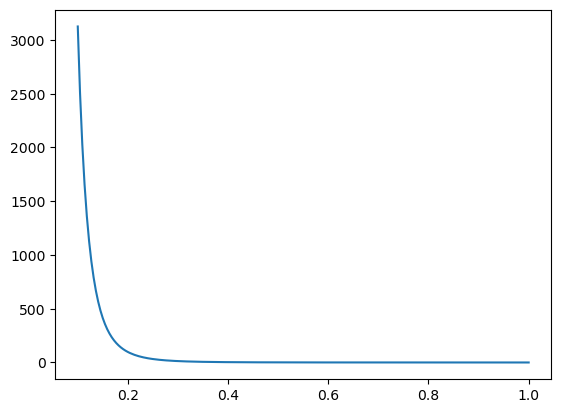

In [26]:
x = np.linspace(.1, 1, num=200)
y = x**(-5)*((.5)**5)

plt.plot(x,y)
plt.show()